<a href="https://colab.research.google.com/github/Sitimildaalkan/milda_PCD/blob/main/Exploratory_Data_Analysis_(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Understanding

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.shape

(1338, 7)

In [6]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
df.describe(include='O')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [10]:
df.sex.unique()

array(['female', 'male'], dtype=object)

#Data Cleaning

In [11]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [12]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [13]:
df.drop_duplicates(keep = 'first', inplace=True)

#Data Visualization

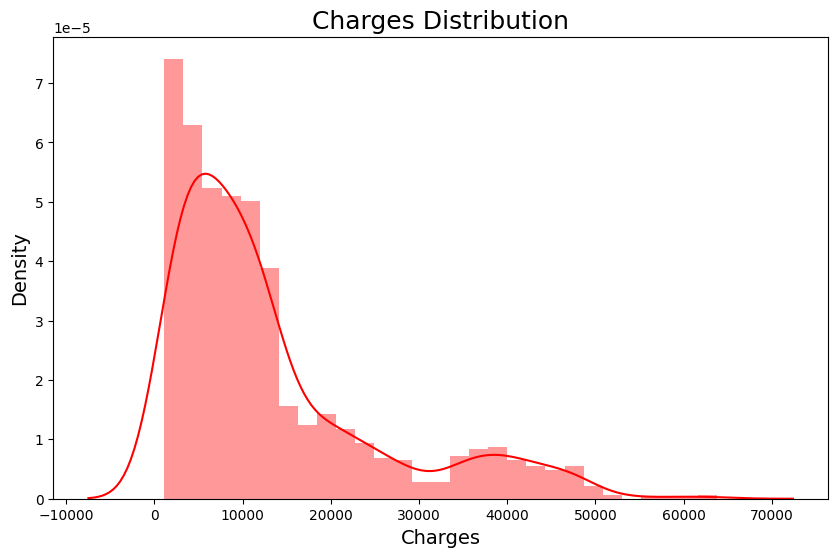

In [17]:
plt.figure(figsize=(10,6))
sns.distplot(df.charges,color='r')
plt.title('Charges Distribution',size=18)
plt.xlabel('Charges',size=14)
plt.ylabel('Density',size=14)
plt.show()

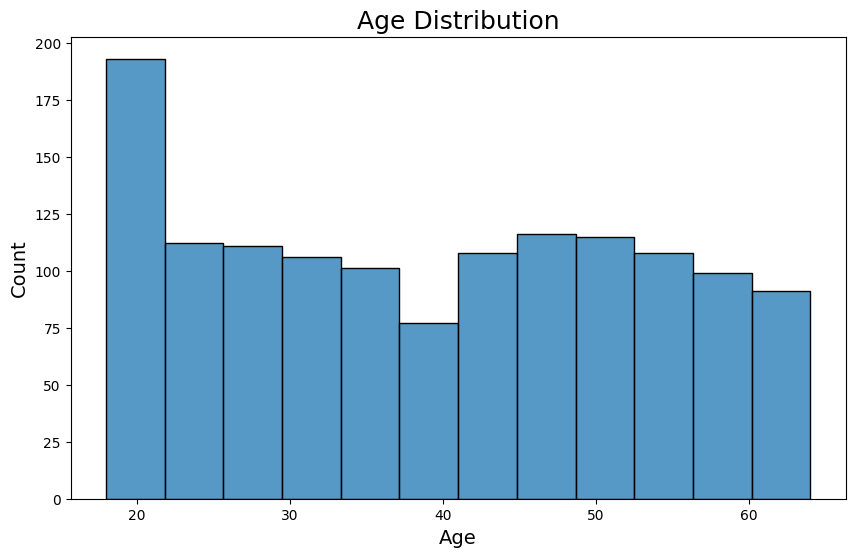

In [18]:
plt.figure(figsize=(10,6))
sns.histplot(df.age)
plt.title('Age Distribution',size=18)
plt.xlabel('Age',size=14)
plt.ylabel('Count',size=14)
plt.show()

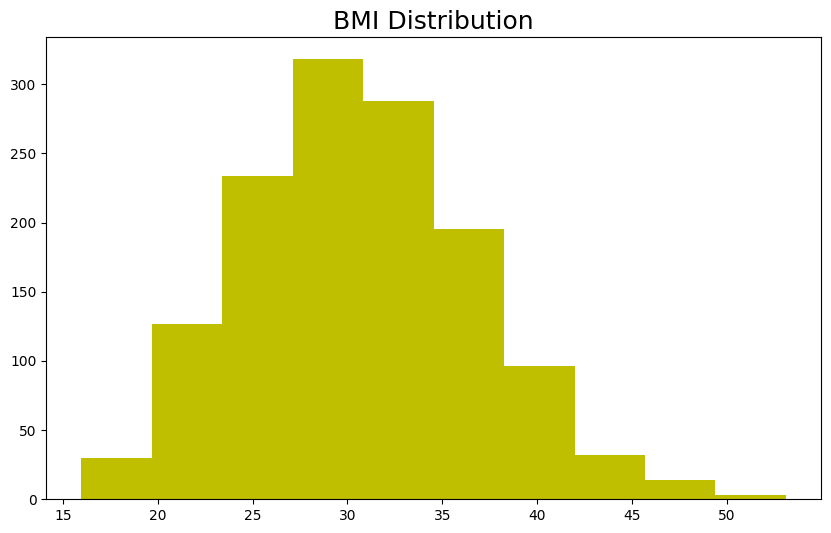

In [19]:
plt.figure(figsize=(10,6))
plt.hist(df.bmi,color='y')
plt.title('BMI Distribution',size=18)
plt.show()

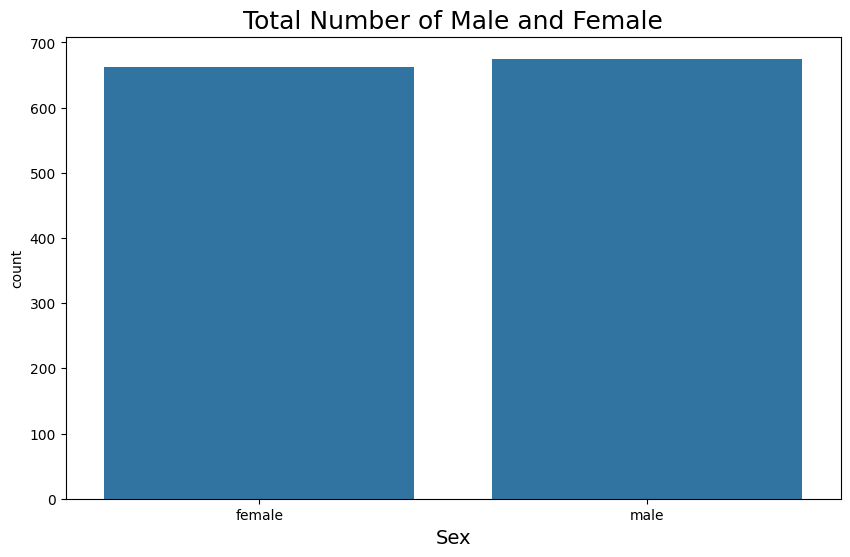

In [20]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'sex',data = df)
plt.title('Total Number of Male and Female',size=18)
plt.xlabel('Sex',size=14)
plt.show()

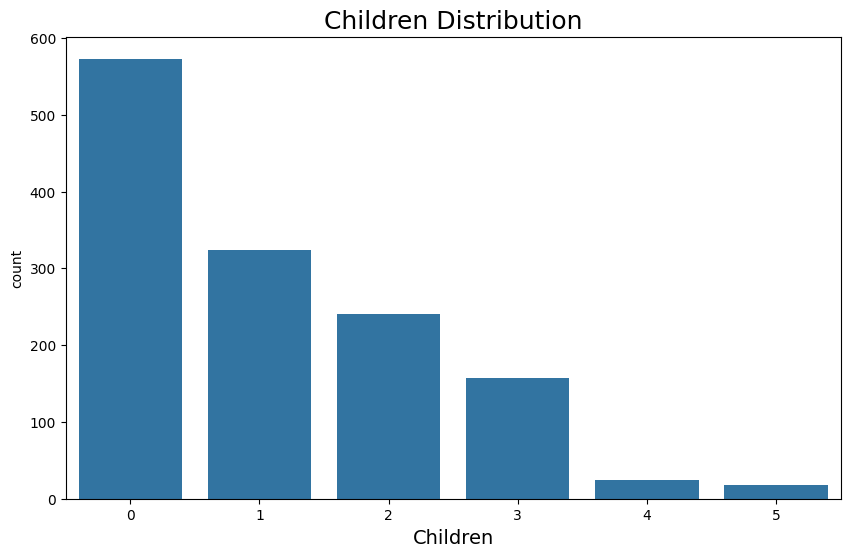

In [21]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'children',data = df)
plt.title('Children Distribution',size=18)
plt.xlabel('Children',size=14)
plt.show()

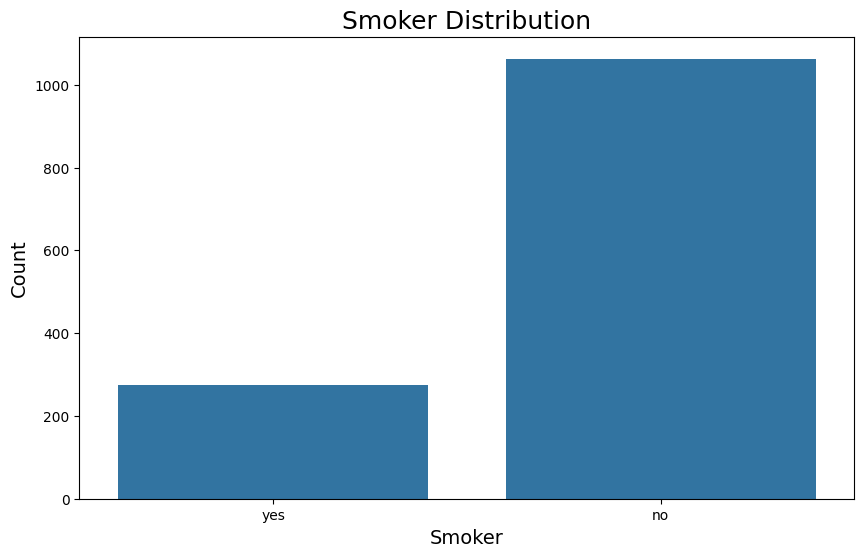

In [22]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'smoker',data = df)
plt.title('Smoker Distribution',size=18)
plt.xlabel('Smoker',size=14)
plt.ylabel('Count',size=14)
plt.show()

In [23]:
df.smoker.value_counts()

,count
smoker,
no,1063
yes,274


Region

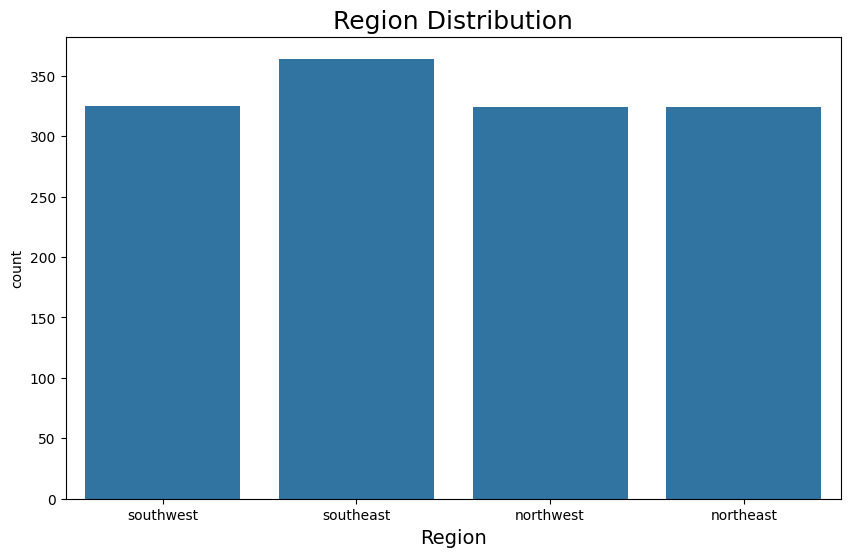

In [26]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'region',data = df)
plt.title('Region Distribution',size=18)
plt.xlabel('Region',size=14 )
plt.show()

#Bivariate Analysis

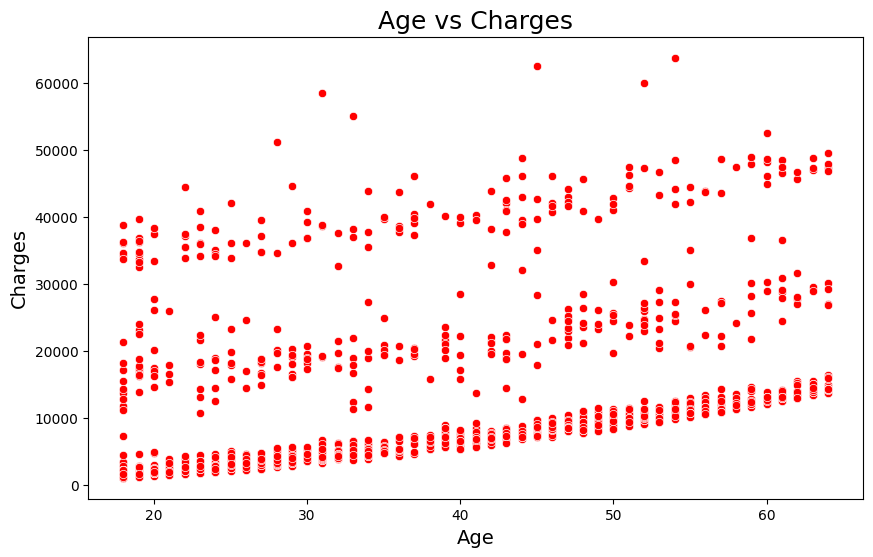

In [29]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'age',y='charges',color='r',data = df)
plt.title('Age vs Charges',size=18)
plt.xlabel('Age',size=14)
plt.ylabel('Charges',size=14)
plt.show()

Text(0.5, 1.0, 'Smoker vs Charges')

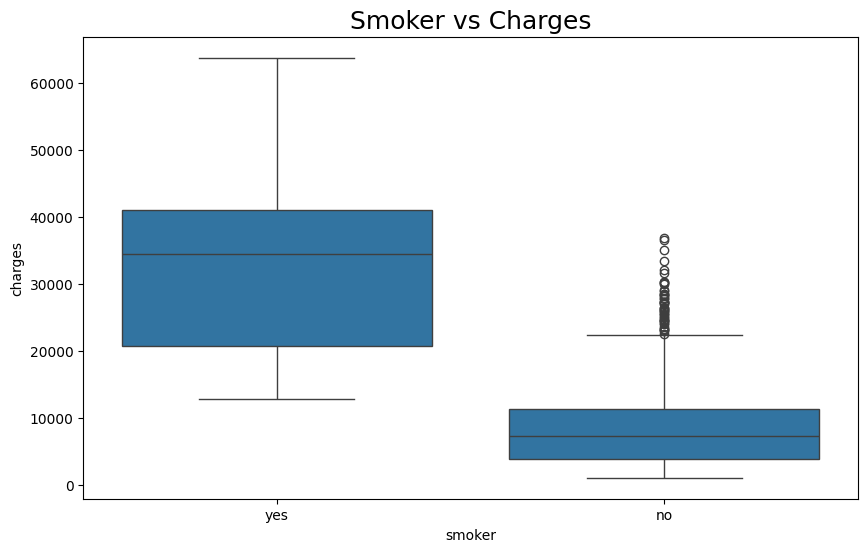

In [30]:
plt.figure(figsize=(10,6))
sns.boxplot(x = 'smoker',y='charges',data = df)
plt.title('Smoker vs Charges',size=18)

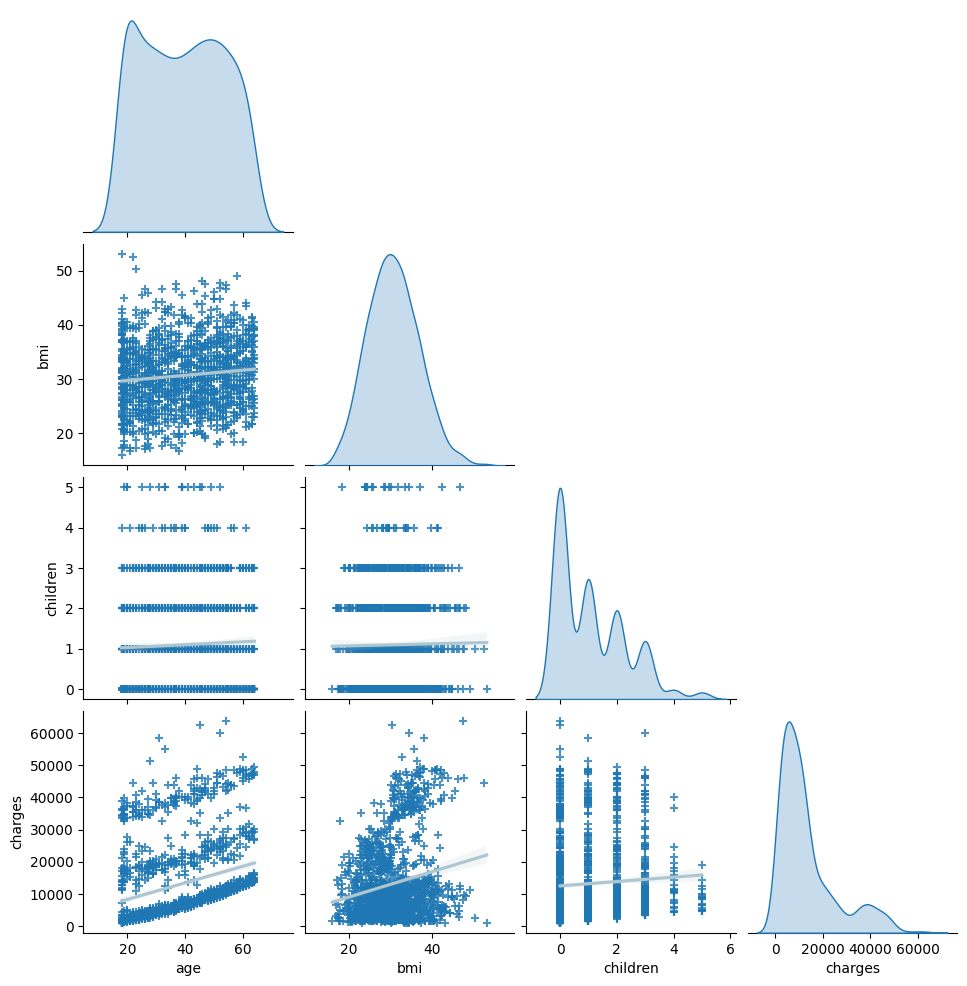

In [35]:
sns.pairplot(df,
             markers="+",
             diag_kind="kde",
             kind='reg',
             plot_kws={'line_kws':{'color':'#aec6cf'}},
             corner=True);

Correlation

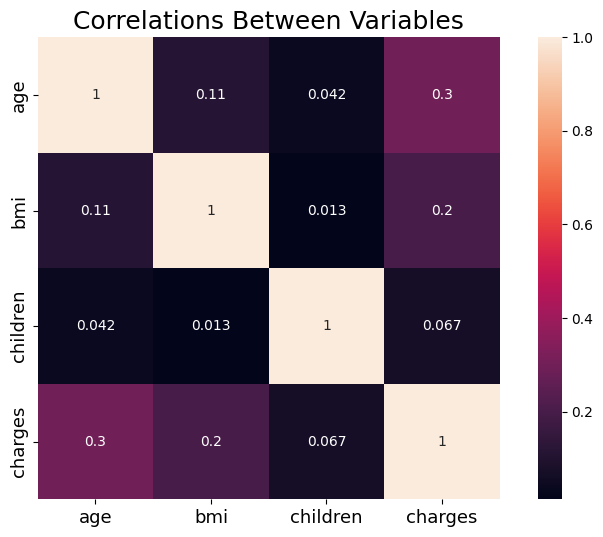

In [37]:
plt.figure(figsize=(10,6))
# Select only numerical features for correlation calculation
numerical_df = df.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot=True, square=True)
plt.title('Correlations Between Variables', size=18)
plt.xticks(size=13)
plt.yticks(size=13)
plt.show()